# SVD Image Decomposition / Compression

En este notebook exploramos como podemos utilizar la SVD para realizar la compression de una imagen y ir viendo que a medida que realizamos la reduccion de dimensiones vamos perdiendo informacion y como esto afecta a la misma.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

from PIL import Image

## Preparando el set de datos

In [4]:
# llevamos la imagen a una representacion matricial con numpy 
# para poder operar
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
# realizamos el plot a partir de la matriz (no la imagen)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray');

NameError: name 'imggray' is not defined

## SVD

In [11]:
imgmat

matrix([[48., 24., 25., ..., 15.,  0.,  0.],
        [27., 29., 26., ..., 22., 17.,  3.],
        [55., 93., 37., ..., 19., 21., 55.],
        ...,
        [25., 20., 23., ..., 45., 62., 43.],
        [24., 23., 24., ..., 42., 61., 40.],
        [23., 23., 24., ..., 40., 62., 45.]])

In [12]:
# realizamos la descomposicion en valores singulares
u, s, v = np.linalg.svd(imgmat)

In [13]:
# verificamos los valores singulares
s

array([16391.48506258,  2110.3977312 ,  1479.87516231,   684.1869419 ,
         600.10386076,   519.8497992 ,   497.41358522,   462.20827063,
         446.51115661,   423.00742436,   413.50179729,   397.90082403,
         394.38865143,   388.33262571,   381.4971987 ,   368.87020177,
         363.54427783,   360.33889795,   347.51512467,   340.33374358,
         336.50871272,   331.25301062,   328.91663328,   317.33453723,
         312.52771936,   309.00738122,   306.39169444,   300.8687355 ,
         296.2260286 ,   293.77978561,   288.93066854,   285.76894194,
         283.93354061,   281.00103004,   279.23763749,   272.93347386,
         272.35595221,   266.9388903 ,   266.3648373 ,   264.98977644,
         258.05973456,   254.69607369,   253.45894942,   249.09577776,
         248.71526279,   245.94216763,   243.89981032,   241.81496168,
         239.468469  ,   237.12155662,   233.8659702 ,   231.13691511,
         228.53330494,   224.98451233,   224.13325533,   220.27840648,
      

## Analisis de valores singulares

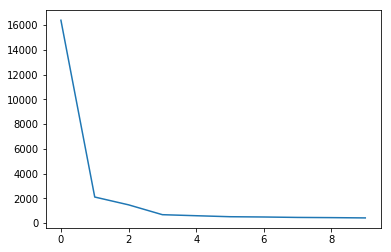

In [14]:
# realizamos un plot de los valores singulaes
# es interesante ir reduciendo el rango para poder 
# verificar algun posible 'codo' para poder considerar 
# la dimensionalidad intrinseca de los datos
#plt.plot(s)
plt.plot(s[:10])

## Cálculo de Energía

In [15]:
# calculo de energia
singular_values = s
energy_total = sum(singular_values**2)
sv_pow = singular_values**2
energy_percentage = ((sv_pow / energy_total) * 100)
print(energy_percentage)

[9.49256185e+01 1.57353154e+00 7.73743464e-01 1.65385105e-01
 1.27232972e-01 9.54778415e-02 8.74142259e-02 7.54783253e-02
 7.04387208e-02 6.32182997e-02 6.04089983e-02 5.59366571e-02
 5.49535370e-02 5.32788190e-02 5.14196999e-02 4.80721978e-02
 4.66940407e-02 4.58742654e-02 4.26672107e-02 4.09220002e-02
 4.00073198e-02 3.87673843e-02 3.82224484e-02 3.55779986e-02
 3.45083279e-02 3.37352970e-02 3.31665889e-02 3.19816564e-02
 3.10022535e-02 3.04923327e-02 2.94940299e-02 2.88520639e-02
 2.84826391e-02 2.78973310e-02 2.75482960e-02 2.63184578e-02
 2.62071970e-02 2.51750610e-02 2.50668994e-02 2.48087606e-02
 2.35281252e-02 2.29187713e-02 2.26966673e-02 2.19219692e-02
 2.18550450e-02 2.13704085e-02 2.10169531e-02 2.06591842e-02
 2.02601896e-02 1.98650154e-02 1.93232822e-02 1.88749346e-02
 1.84521014e-02 1.78834818e-02 1.77484090e-02 1.71431523e-02
 1.68336912e-02 1.67570607e-02 1.64863531e-02 1.63337338e-02
 1.57305718e-02 1.53589612e-02 1.50067365e-02 1.47071776e-02
 1.42530515e-02 1.415494

In [16]:
# realizamos entonces el calculo de cuanta energia se va
# acumulando con cada uno de los 
acumulated_energy = 0
for i in range(len(energy_percentage)):
    acumulated_energy = acumulated_energy + energy_percentage[i]
    print ('Number of Singular Values ' + str(i+1) + ': ' + str(singular_values[i]) + ' ' + str(round(acumulated_energy,2)) + '%')

Number of Singular Values 1: 16391.485062580283 94.93%
Number of Singular Values 2: 2110.3977311970852 96.5%
Number of Singular Values 3: 1479.8751623054845 97.27%
Number of Singular Values 4: 684.1869418988897 97.44%
Number of Singular Values 5: 600.1038607552169 97.57%
Number of Singular Values 6: 519.8497991962739 97.66%
Number of Singular Values 7: 497.4135852186298 97.75%
Number of Singular Values 8: 462.2082706307524 97.82%
Number of Singular Values 9: 446.5111566121984 97.89%
Number of Singular Values 10: 423.0074243591007 97.96%
Number of Singular Values 11: 413.50179728732286 98.02%
Number of Singular Values 12: 397.9008240312827 98.07%
Number of Singular Values 13: 394.3886514308749 98.13%
Number of Singular Values 14: 388.33262570799025 98.18%
Number of Singular Values 15: 381.497198695191 98.23%
Number of Singular Values 16: 368.8702017736897 98.28%
Number of Singular Values 17: 363.5442778308351 98.33%
Number of Singular Values 18: 360.33889794893344 98.37%
Number of Singu

## Reconstruyendo la imagen a partir de los datos reducidos

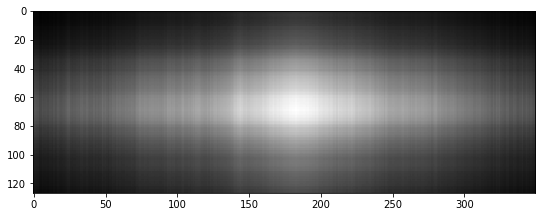

In [17]:
reconstimg = np.matrix(u[:, :1]) * np.diag(s[:1]) * np.matrix(v[:1, :])
plt.figure(figsize=(9,6))
plt.imshow(reconstimg, cmap='gray');

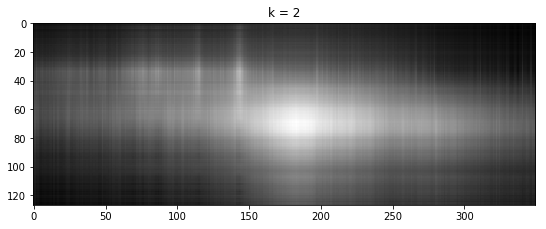

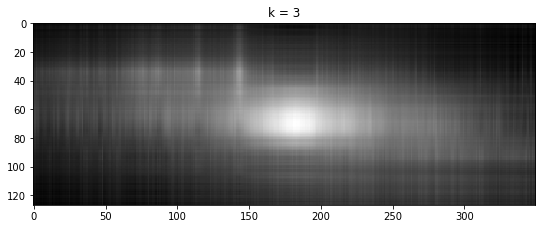

In [18]:
for i in range(2, 4):
    reconstimg = np.matrix(u[:, :i]) * np.diag(s[:i]) * np.matrix(v[:i, :])
    plt.figure(figsize=(9,6))
    plt.imshow(reconstimg, cmap='gray')
    title = "k = %s" % i
    plt.title(title)
    plt.show()

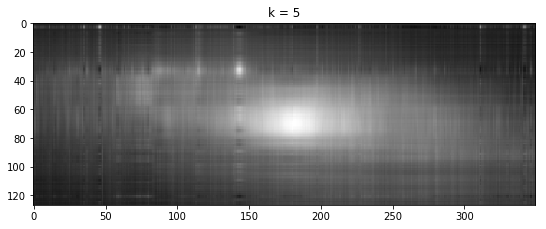

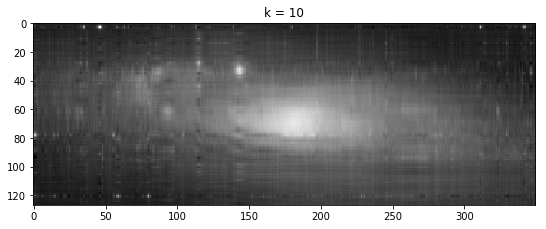

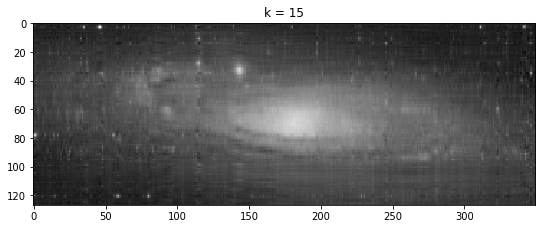

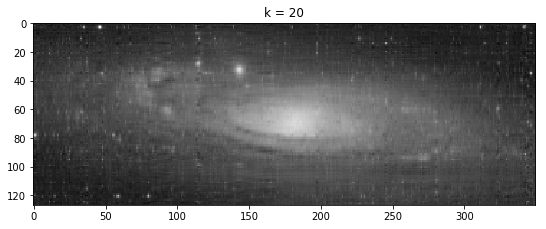

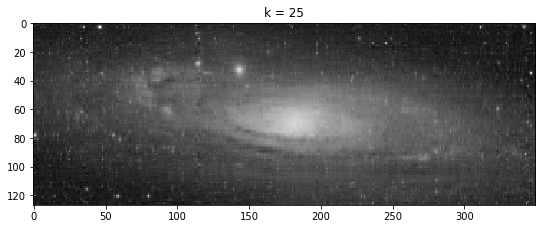

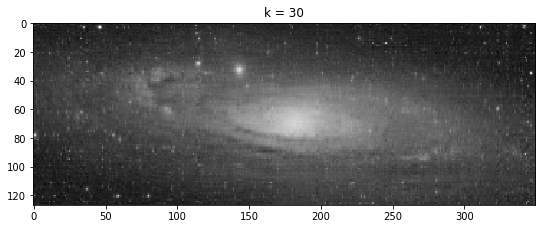

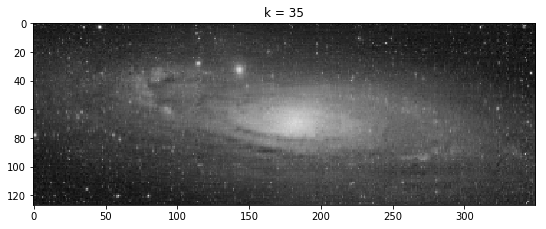

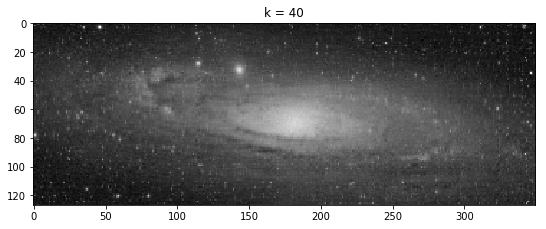

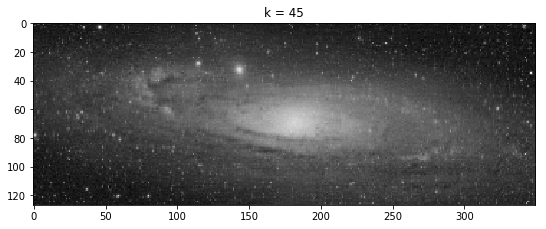

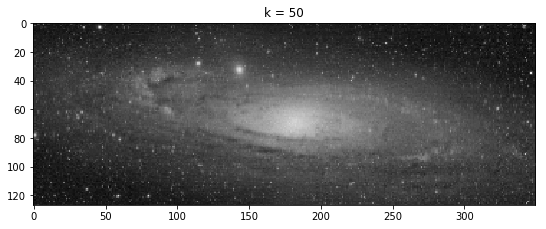

In [13]:
for i in range(5, 51, 5):
    reconstimg = np.matrix(u[:, :i]) * np.diag(s[:i]) * np.matrix(v[:i, :])
    plt.figure(figsize=(9,6))
    plt.imshow(reconstimg, cmap='gray')
    title = "k = %s" % i
    plt.title(title)
    plt.show()